In [59]:
from gibbs.preparation.varqite import pauli_rotations_ansatz,pauli_rotations_ansatz_copy
import numpy as np
from dualtime.src.mclachlan import VarQITE
from gibbs.utils import create_hamiltonian_lattice,printarray,expected_state,state_from_ansatz, identity_purification, conjugate_pauli
from gibbs.preparation.varqite import efficient_su2_ansatz,brute_force_optimization, efficient_su2_ansatz_V3
from gibbs.preparation.free_energy import brute_cmaes
from qiskit.opflow import PauliSumOp
from qiskit.quantum_info import SparsePauliOp,Pauli,partial_trace,Statevector

from surfer.gradient import ReverseGradient
gradient = ReverseGradient(partial_gradient=True,do_checks=False)

%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'pauli_rotations_ansatz_copy' from 'gibbs.preparation.varqite' (/home/drudis/GH/Julien/gibbs_code/gibbs/preparation/varqite.py)

[Pauli('XY'), Pauli('ZZ')]
[-5.00000000e-01+0.00000000e+00j  5.00000000e-01+9.81307787e-18j
  5.31300993e-17-2.10209437e-17j -3.55336761e-33-1.02118568e-33j
  1.62646996e-33-2.36158002e-17j  9.81307787e-18-8.12941988e-18j
 -2.60600060e-33-6.64898985e-49j  8.73762321e-34+1.68381056e-33j
  3.66906400e-34+1.27017643e-49j  9.33915519e-34-4.88226381e-34j
  4.59869434e-17-2.36908657e-17j -2.36158002e-17-1.18332185e-34j
 -2.31743687e-34+1.66799493e-35j  1.05675710e-34+1.64641967e-33j
 -2.60600060e-33+6.85213589e-49j  6.19042353e-34+2.26115815e-49j
  6.81779565e-34-4.88226381e-34j  6.81779565e-34-4.88226381e-34j]


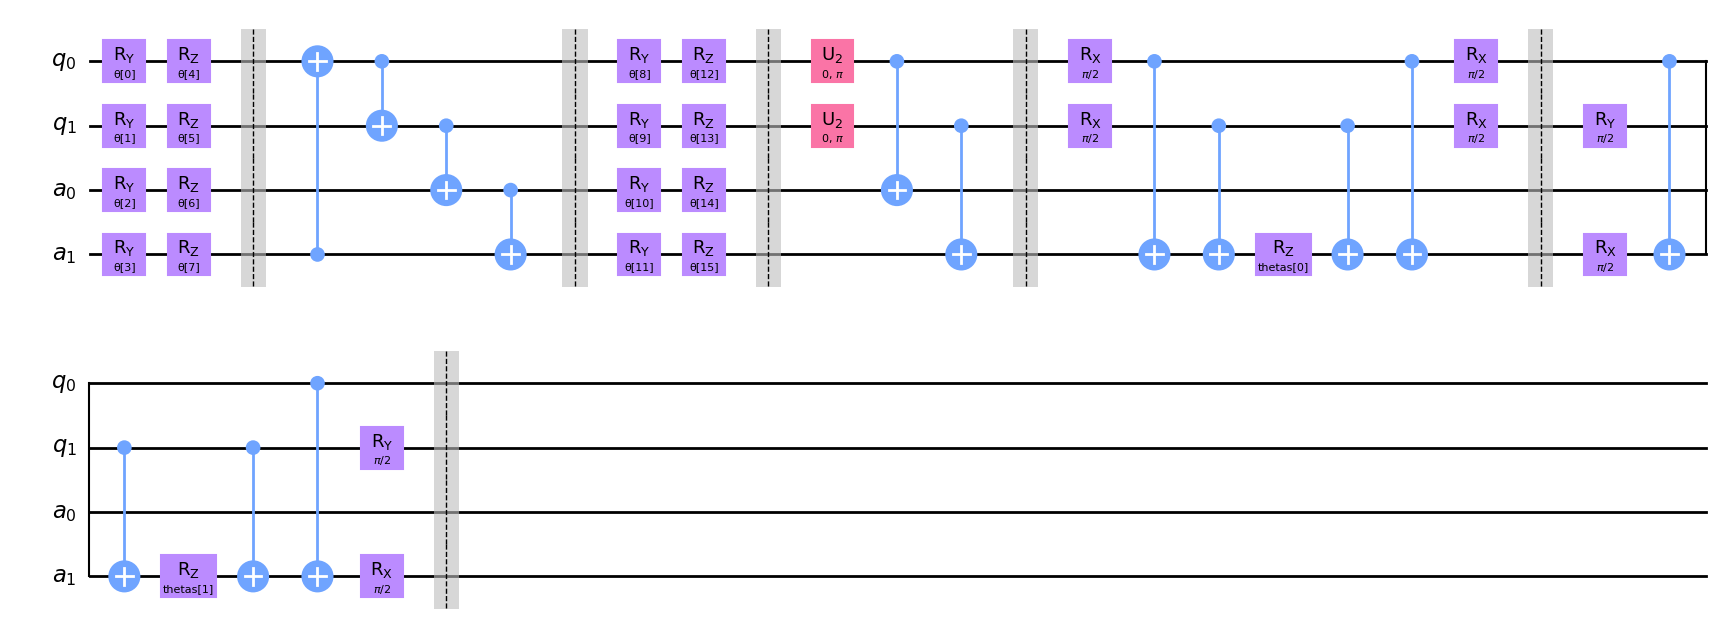

[0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.5]


In [76]:
hamiltonian = SparsePauliOp.from_list([("XY",1.0),("ZZ",1.0)])
N = hamiltonian.num_qubits
print(list(hamiltonian.paulis))
ansatz,x0 = pauli_rotations_ansatz(hamiltonian,depth=1)
print(gradient.compute(hamiltonian^("I"*N), ansatz, x0))
display(ansatz.decompose().draw(output='mpl'))
printarray(Statevector(ansatz.bind_parameters(x0)))


In [41]:
from gibbs.preparation.pauli_rotation import RPGate
rpgate = RPGate(Pauli(hamiltonian + "I"*N),4)
rpgate._define().draw()

q_0: ─────────────────────────────────────────
                                              
q_1: ─────────────────────────────────────────
     ┌─────┐┌───┐┌───┐┌───────┐┌───┐┌───┐┌───┐
q_2: ┤ Sdg ├┤ H ├┤ X ├┤ Rz(4) ├┤ X ├┤ H ├┤ S ├
     └┬───┬┘└───┘└─┬─┘└───────┘└─┬─┘├───┤└───┘
q_3: ─┤ H ├────────■─────────────■──┤ H ├─────
      └───┘                         └───┘